For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline # this line is needed to display the plots in the notebook

In [7]:
# read the data
df = pd.read_csv('911.csv')

df.head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [ ]:
df.zip.value_counts().head(5)
#Top 5 zipcodes for 911 calls

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

In [11]:
#top 5 townships for 911 calls
df.twp.value_counts().head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

In [ ]:
df.title.nunique()
#no of unique titles

110

In [ ]:
df.title.value_counts(normalize=True).head(15)
#top 15 titles

title
Traffic: VEHICLE ACCIDENT -       0.231838
Traffic: DISABLED VEHICLE -       0.077413
Fire: FIRE ALARM                  0.055241
EMS: RESPIRATORY EMERGENCY        0.051381
EMS: CARDIAC EMERGENCY            0.050376
EMS: FALL VICTIM                  0.048878
EMS: VEHICLE ACCIDENT             0.039551
Traffic: ROAD OBSTRUCTION -       0.031601
EMS: SUBJECT IN PAIN              0.027007
EMS: HEAD INJURY                  0.026444
EMS: UNKNOWN MEDICAL EMERGENCY    0.018826
EMS: SYNCOPAL EPISODE             0.017258
Fire: VEHICLE ACCIDENT            0.016464
EMS: SEIZURES                     0.016383
EMS: GENERAL WEAKNESS             0.014715
Name: proportion, dtype: float64

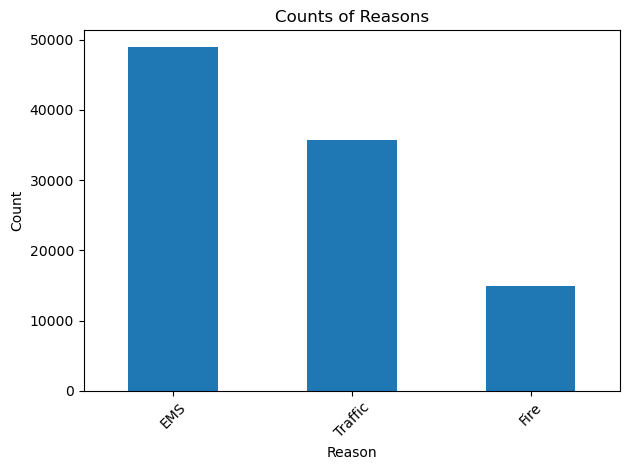

In [18]:
#creating new features from the title column
df['reason'] = df.title.apply(lambda x: x.split(':')[0])
df['reason'] = df['reason'].astype('category')
reason_counts = df['reason'].value_counts()
reason_counts.plot(kind='bar', title='Counts of Reasons')
plt.title('Counts of Reasons')
plt.xlabel('Reason')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#observations
#EMS is the most common reason for 911 calls
#fire is the least common reason for 911 calls


In [ ]:
#doing the above plot using plotly and cufflinks
import cufflinks as cf
cf.go_offline()
reason_counts.iplot(kind='bar', title='Counts of Reasons',
                     xTitle='Reason', yTitle='Count')

#iplot is an interactive plot

In [ ]:
#Look at timestamps
df.timeStamp.head()
#its data type is string


0    2015-12-10 17:40:00
1    2015-12-10 17:40:00
2    2015-12-10 17:40:00
3    2015-12-10 17:40:01
4    2015-12-10 17:40:01
Name: timeStamp, dtype: object

In [22]:
#converting the timeStamp column to datetime type
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['timeStamp'].head()


0   2015-12-10 17:40:00
1   2015-12-10 17:40:00
2   2015-12-10 17:40:00
3   2015-12-10 17:40:01
4   2015-12-10 17:40:01
Name: timeStamp, dtype: datetime64[ns]

In [ ]:
df['timeStamp'].iloc[0] #iloc is used to access the element at the specified 
#index position

Timestamp('2015-12-10 17:40:00')

In [28]:
time = df['timeStamp'].iloc[0]
hour = time.hour #extracting the hour from the timestamp
print("The hour extracted from the timestamp is:", hour) #displaying the 
#extracted hour

The hour extracted from the timestamp is: 17


In [29]:
month = time.month #extracting the month from the timestamp
print("The month extracted from the timestamp is:", month) #displaying the month

day = time.day #extracting the day from the timestamp
print("The day extracted from the timestamp is:", day) #displaying the day

The month extracted from the timestamp is: 12
The day extracted from the timestamp is: 10


In [30]:
#Creating new columns for hour, month and day of the week
df['hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['month'] = df['timeStamp'].apply(lambda x: x.month)
df['day_of_week'] = df['timeStamp'].apply(lambda x: x.dayofweek)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day_of_week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [31]:
#mapping the day of the week to the actual day
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['day_of_week'] = df['day_of_week'].map(dmap)


print("Day of Week Mapping Completed:")
df.head()

Day of Week Mapping Completed:


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day_of_week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


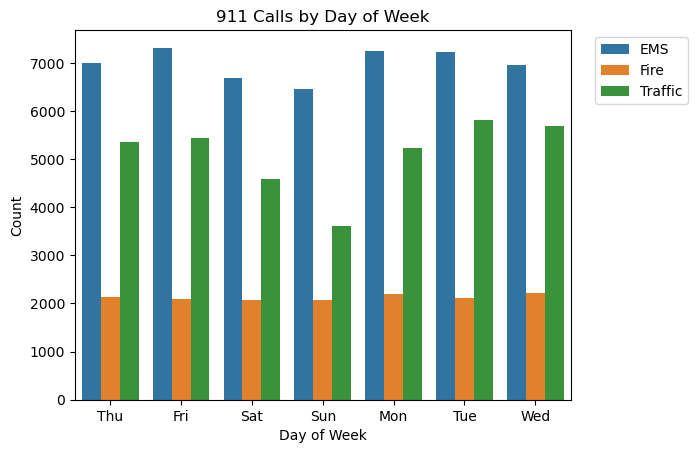

In [ ]:
#countplot of the day of the week column with the hue based off of the reason column

sns.countplot(x='day_of_week', data=df,hue='reason')
plt.title('911 Calls by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()



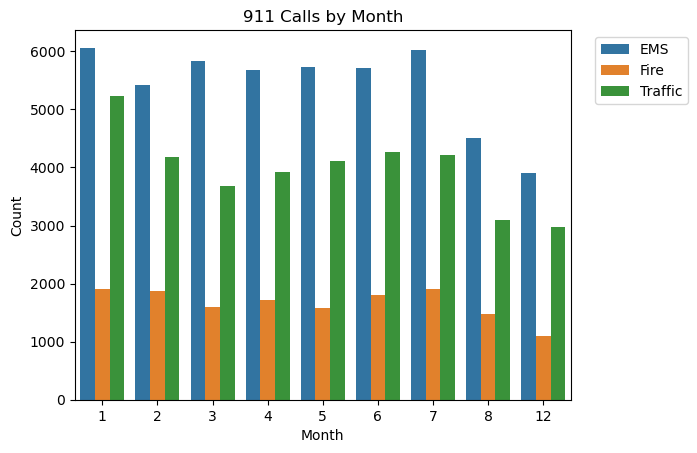

In [ ]:
#countplot of the month column with the hue based off of the reason column
sns.countplot(x='month', data=df,hue='reason')
plt.title('911 Calls by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

#month 9,10 and 11 are missing

In [38]:
missing_months = df['month'].isin([9, 10, 11]).sum()
print(f'Missing months count: {missing_months}')
month_counts = df.groupby('month').count()
print(month_counts)
#missing months are 9,10 and 11

Missing months count: 0
         lat    lng   desc    zip  title  timeStamp    twp   addr      e  \
month                                                                      
1      13205  13205  13205  11527  13205      13205  13203  13096  13205   
2      11467  11467  11467   9930  11467      11467  11465  11396  11467   
3      11101  11101  11101   9755  11101      11101  11092  11059  11101   
4      11326  11326  11326   9895  11326      11326  11323  11283  11326   
5      11423  11423  11423   9946  11423      11423  11420  11378  11423   
6      11786  11786  11786  10212  11786      11786  11777  11732  11786   
7      12137  12137  12137  10633  12137      12137  12133  12088  12137   
8       9078   9078   9078   7832   9078       9078   9073   9025   9078   
12      7969   7969   7969   6907   7969       7969   7963   7916   7969   

       reason   hour  day_of_week  
month                              
1       13205  13205        13205  
2       11467  11467        114

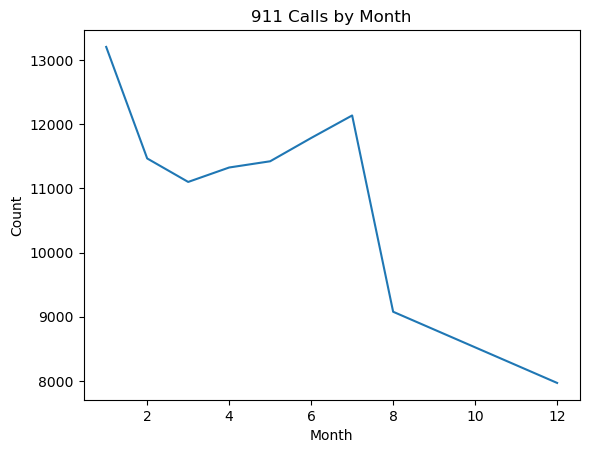

In [45]:
#plotting the count of calls per month
month_counts['lat'].plot()
plt.title('911 Calls by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

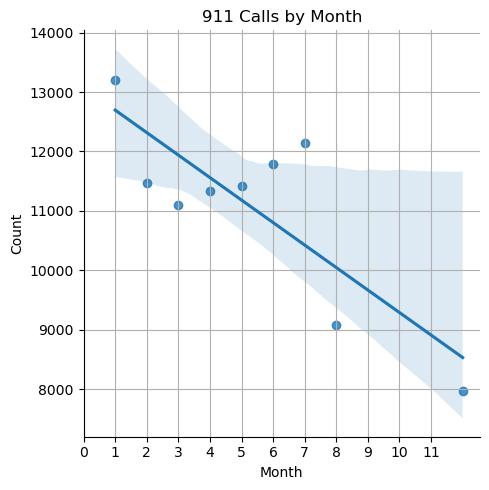

In [ ]:
#create a linear fit on the number of calls per month
sns.lmplot(x='month', y='lat', data=month_counts.reset_index())#reset_index() is 
#used to reset the index of the dataframe to the default integer index 
plt.title('911 Calls by Month')
#increase xticks to show all months
plt.xticks(np.arange(0, 12, step=1))
plt.xlabel('Month')
plt.ylabel('Count')

plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
#can we make this plot more interactive using plotly and cufflinks
month_counts.reset_index().iplot(kind='scatter', x='month', y='lat', mode='markers+lines',
                    xTitle='Month', yTitle='Count', title='911 Calls by Month')

In [ ]:
#doing the above plot using plotly and cufflinks

#increase xticks to show all months
layout = {
    'xaxis':{
    
        'tickvals': list(range(1, 13)),
        'ticktext': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    }
}
month_counts['lat'].iplot(title='911 Calls by Month',
                          xTitle='Month', yTitle='Count', layout=layout)
#Fit an lmplot on the number of calls per month using plotly and cufflinks
#Not possible to fit a line in plotly




In [68]:
#Creating a new column called 'Date' that contains the date from the timeStamp column
df['date'] = df['timeStamp'].apply(lambda x: x.date())
df['date'] = pd.to_datetime(df['date'])#converting the date column to datetime type
print("Date column created:")
print(df['date'].head())
print("Date column data type:")
print(df['date'].dtype)



Date column created:
0   2015-12-10
1   2015-12-10
2   2015-12-10
3   2015-12-10
4   2015-12-10
Name: date, dtype: datetime64[ns]
Date column data type:
datetime64[ns]


In [ ]:
df.groupby('date').count()['lat']
#grouping data by date and counting the number of calls per date

date
2015-12-10    115
2015-12-11    396
2015-12-12    403
2015-12-13    319
2015-12-14    447
             ... 
2016-08-20    328
2016-08-21    357
2016-08-22    389
2016-08-23    439
2016-08-24    132
Name: lat, Length: 259, dtype: int64

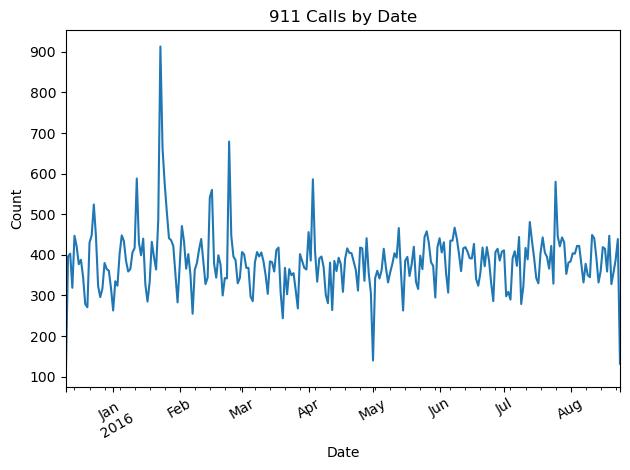

In [ ]:
#plotting the number of calls per date
df.groupby('date').count()['lat'].plot()
plt.title('911 Calls by Date')
plt.xlabel('Date')
plt.xlim(df['date'].min(), df['date'].max())
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [ ]:
calls_by_date = df.groupby('date').count()['lat']
#plotting the number of calls per date using plotly and cufflinks
calls_by_date.iplot(title='911 Calls by Date',
                    xTitle='Date', yTitle='Count')

#observations:
#There are some spikes in the number of calls on certain dates
#Seems like January 23, 2016 had the highest number of calls
#We can inspect into this further by looking at the reason for the calls on this date

/Users/shaarifakhtar/Documents/python/anaconda3/lib/python3.12/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



In [81]:
#making the plot for traffic calls first
calls_by_date_traffic = df[df['reason'] == 'Traffic'].groupby('date').count()['lat']
print("Traffic Calls by Date:\n",calls_by_date_traffic)

Traffic Calls by Date:
 date
2015-12-10     43
2015-12-11    141
2015-12-12    146
2015-12-13     78
2015-12-14    186
             ... 
2016-08-20    117
2016-08-21    138
2016-08-22    156
2016-08-23    151
2016-08-24     42
Name: lat, Length: 259, dtype: int64


In [ ]:
calls_by_date_traffic.iplot(title='Traffic Calls by Date',
                            xTitle='Date', yTitle='Count')

#January 23, 2016 had the highest number of traffic calls 
# confirming our suspicion

/Users/shaarifakhtar/Documents/python/anaconda3/lib/python3.12/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



In [ ]:
#Calls by Fire reason
calls_by_date_fire = df[df['reason'] == 'Fire'].groupby('date').count()['lat']
print("Fire Calls by Date:\n",calls_by_date_fire)
calls_by_date_fire.iplot(title='Fire Calls by Date',
                         xTitle='Date', yTitle='Count')
#Fire incidents are showing peaks on certain dates not just 23rd Jan 2016
#there must be traffic issues on 23rd Jan 2016 not as much as fire incidents

Fire Calls by Date:
 date
2015-12-10    15
2015-12-11    69
2015-12-12    68
2015-12-13    51
2015-12-14    39
              ..
2016-08-20    52
2016-08-21    54
2016-08-22    51
2016-08-23    70
2016-08-24    19
Name: lat, Length: 259, dtype: int64


/Users/shaarifakhtar/Documents/python/anaconda3/lib/python3.12/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



In [ ]:
#Calls by EMS reason
calls_by_date_ems = df[df['reason'] == 'EMS'].groupby('date').count()['lat']
print("EMS Calls by Date:\n",calls_by_date_ems)
calls_by_date_ems.iplot(title='EMS Calls by Date',
                        xTitle='Date', yTitle='Count')
#EMS incidents are showing peaks on certain dates not just 23rd Jan 2016
#there must be traffic issues on 23rd Jan 2016 not as much as EMS incidents

EMS Calls by Date:
 date
2015-12-10     57
2015-12-11    186
2015-12-12    189
2015-12-13    190
2015-12-14    222
             ... 
2016-08-20    159
2016-08-21    165
2016-08-22    182
2016-08-23    218
2016-08-24     71
Name: lat, Length: 259, dtype: int64


/Users/shaarifakhtar/Documents/python/anaconda3/lib/python3.12/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



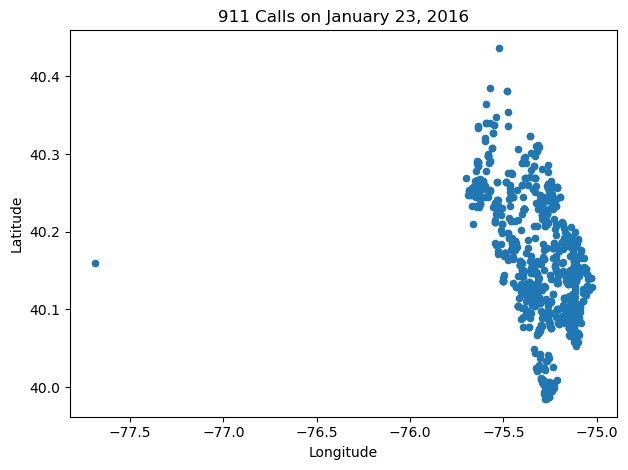

In [ ]:
#Lets plot the latitudes and longitudes of the calls for january 23, 2016
df[df['date'] == '2016-01-23'][['lat', 'lng']].plot(kind='scatter', x='lng', y='lat')
plt.title('911 Calls on January 23, 2016')
plt.xlabel('Longitude') 
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()


In [ ]:
#Can we superimpose this on the map of USA?
#Yes, we can use plotly for this
from plotly import express as px
fig = px.scatter_mapbox(df[df['date'] == '2016-01-23'], lat='lat', lon='lng',
                        zoom=6, height=300)
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={'r':0, 't':0, 'l':0, 'b':0})


fig.update_layout(title='911 Calls on January 23, 2016')

fig.show()

#This looks like an issue of a particular area in the USA
#Yes, wikipedia tells us that there was a blizzard on 23rd Jan 2016 
# in the northeast USA which caused a lot of accidents and emergencies
#This explains the spike in the number of calls on this date

In [93]:
calls_by_hour_day = df.groupby(['day_of_week', 'hour']).count()['reason'].unstack()
print("Calls by Hour and Day:\n",calls_by_hour_day)


Calls by Hour and Day:
 hour          0    1    2    3    4    5    6    7    8    9   ...   14   15  \
day_of_week                                                    ...             
Fri          275  235  191  175  201  194  372  598  742  752  ...  932  980   
Mon          282  221  201  194  204  267  397  653  819  786  ...  869  913   
Sat          375  301  263  260  224  231  257  391  459  640  ...  789  796   
Sun          383  306  286  268  242  240  300  402  483  620  ...  684  691   
Thu          278  202  233  159  182  203  362  570  777  828  ...  876  969   
Tue          269  240  186  170  209  239  415  655  889  880  ...  943  938   
Wed          250  216  189  209  156  255  410  701  875  808  ...  904  867   

hour           16    17   18   19   20   21   22   23  
day_of_week                                            
Fri          1039   980  820  696  667  559  514  474  
Mon           989   997  885  746  613  497  472  325  
Sat           848   757  778  6

In [ ]:
calls_by_hour_day.iplot(kind='heatmap', title='Calls by Hour and Day',
                         xTitle='Hour', yTitle='Day of Week')
#heatmap of the calls by hour and day of the week
#we can see that most calls are made during the day time on weekdays
#and there are fewer calls during the night time on weekdays

In [ ]:
#Hence, our effort on EDA is complete!
#We have visualized the data to understand the patterns in the 911 calls
#We have also found some interesting insights from the data
#We have also used plotly to make our plots more interactive and informative
#We have also used plotly to plot the 911 calls on the map of USA
#We have also used plotly to plot the heatmap of the calls by hour and day of the week